### 1. 분석 준비

In [1]:
setwd("../data/")
options(repr.plot.width = 12, repr.plot.height = 6)

In [2]:
# install.packages("ggplot2")
# install.packages("lmtest")

In [3]:
library(ggplot2)
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




### 2. 광고료와 총판매액 분석

`-` data

In [4]:
dt <- data.frame(x = c(4,8,9,8,8,12,6,10,6,9),
                 y = c(9,20,22,15,17,30,18,25,10,20))
dt

x,y
<dbl>,<dbl>
4,9
8,20
9,22
8,15
8,17
12,30
6,18
10,25
6,10


`-` 산점도 그리기

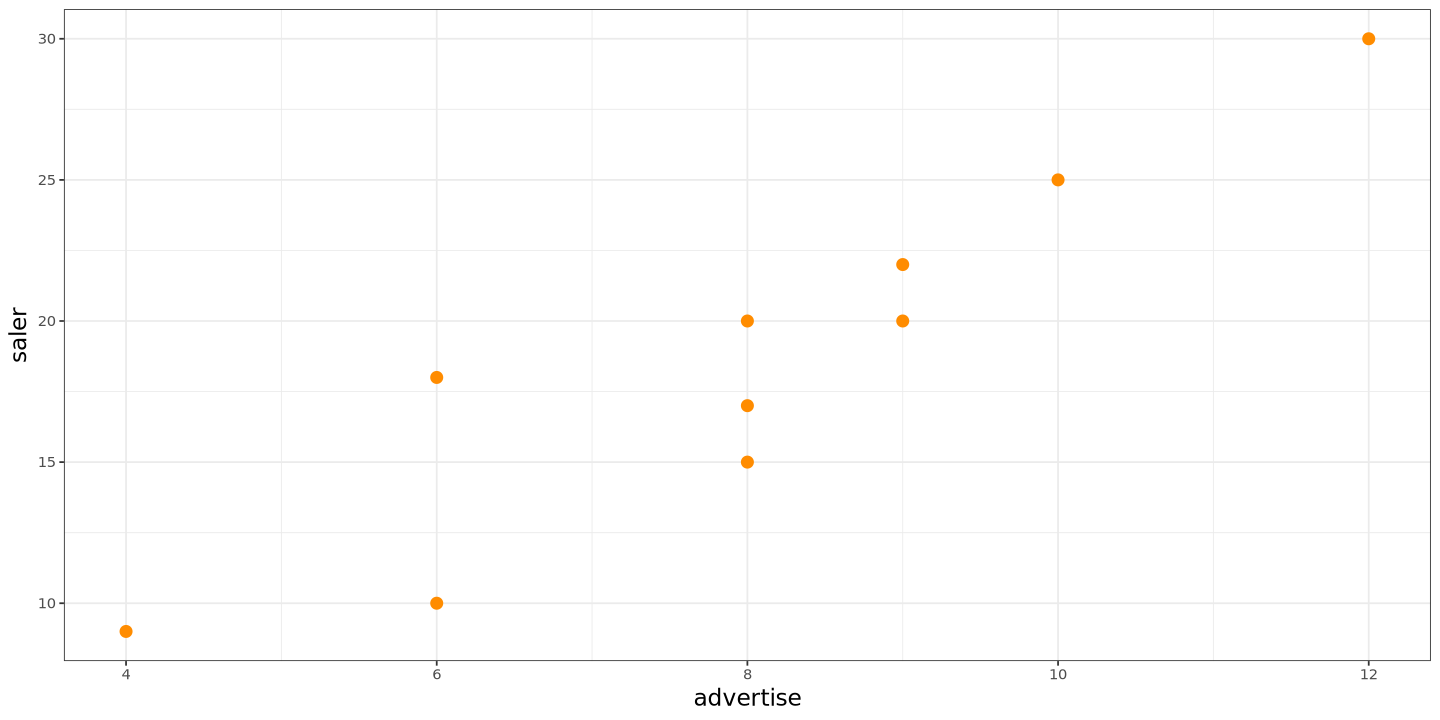

In [5]:
ggplot(dt, aes(x, y)) + geom_point(col = "darkorange", size = 3) + xlab("advertise") + ylab("saler") + theme_bw(base_family = "NanumGothic") + theme(axis.title = element_text(size = 14))

`-` 상관관계 분석

In [6]:
cor(dt$x, dt$y)  ## 상관계수

[1] 0.9218123

$H_0 : \rho_{xy} = 0 ~ ~  vs. ~ ~  H_1 : \rho_{xy} ≠ 0$

In [7]:
cor.test(dt$x, dt$y)  ## 피어슨 상관계수 검정


	Pearson's product-moment correlation

data:  dt$x and dt$y
t = 6.7261, df = 8, p-value = 0.0001487
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6963398 0.9816763
sample estimates:
      cor 
0.9218123 


> x와 y는 상관관계가 있다.

`-` 회귀모형 적합

In [8]:
model <- lm(y~x, dt)
model


Call:
lm(formula = y ~ x, data = dt)

Coefficients:
(Intercept)            x  
     -2.270        2.609  


In [9]:
model$coefficients  ## coef(model)

(Intercept)           x 
  -2.269565    2.608696

In [10]:
ls(model)  ## names(model)

[1] "assign"        "call"          "coefficients"  "df.residual"  
 [5] "effects"       "fitted.values" "model"         "qr"           
 [9] "rank"          "residuals"     "terms"         "xlevels"

> 따라서 추정된 회귀직선은 $\hat{y} = -2.270 + 2.609x$

In [11]:
summary(model)


Call:
lm(formula = y ~ x, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-3.600 -1.502  0.813  1.128  4.617 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.2696     3.2123  -0.707 0.499926    
x             2.6087     0.3878   6.726 0.000149 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.631 on 8 degrees of freedom
Multiple R-squared:  0.8497,	Adjusted R-squared:  0.831 
F-statistic: 45.24 on 1 and 8 DF,  p-value: 0.0001487


`-` 추정된 값 : $\hat{y_i}$

In [12]:
coef(model)[1] + coef(model)[2]*dt$x  ## 직접 계산

[1]  8.165217 18.600000 21.208696 18.600000 18.600000 29.034783 13.382609
 [8] 23.817391 13.382609 21.208696

In [13]:
model$fitted.values  ## fitted.values(model) or fitted(model)

1         2         3         4         5         6         7         8 
 8.165217 18.600000 21.208696 18.600000 18.600000 29.034783 13.382609 23.817391 
        9        10 
13.382609 21.208696

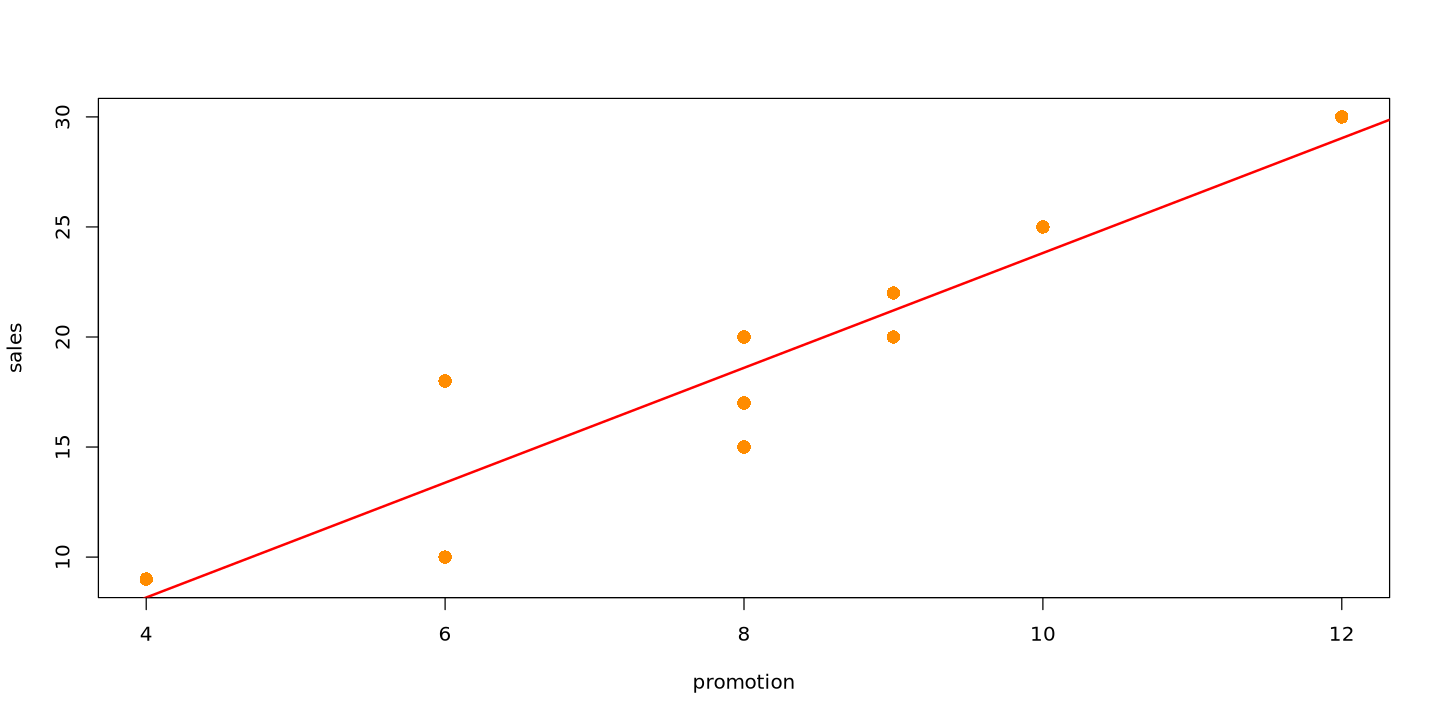

In [14]:
plot(dt$x, dt$y, pch = 16, cex = 1.5, col = "darkorange", xlab = "promotion", ylab = "sales")
abline(model, col = "red", lwd = 2)

`-` 회귀모형의 유의성 검정(F검정)

In [15]:
names(summary(model))

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

In [16]:
print(summary(model)$fstatistic)
print(qf(0.95, 1, 8))

   value    numdf    dendf 
45.24034  1.00000  8.00000 
[1] 5.317655


In [17]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,313.04348,313.043478,45.24034,0.0001486582
Residuals,8,55.35652,6.919565,NA,NA


> p-value가 상당히 낮으므로 귀무가설을 기각, 즉, 적합된 회귀직선은 유의하다.

`-` 회귀계수의 유의성 검정(t검정)

In [18]:
summary(model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-2.269565,3.212348,-0.7065129,0.4999255886
x,2.608696,0.387847,6.7260939,0.0001486582


> 유의수준 $\alpha = 0.05$에서 절편은 유의하지 않고, 회귀계수는 유의하다.

`-` 모형의 적합도

In [22]:
c(summary(model)$r.squared, summary(model)$adj.r.squared)

[1] 0.8497380 0.8309552

`-` 회귀계수에 대한 추론

* $\hat{\beta_1}$에 대한 추론 : confidence interval

수제로 구하기

In [27]:
qt(0.025, length(dt$x)-2)

[1] -2.306004

In [23]:
summary(model)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-2.269565,3.212348,-0.7065129,0.4999255886
x,2.608696,0.387847,6.7260939,0.0001486582


In [32]:
model$coef[2] + qt(0.025, length(dt$x)-2) * summary(model)$coef[2,2]
model$coef[2] + qt(0.975, length(dt$x)-2) * summary(model)$coef[2,2]

x 
1.714319

x 
3.503073

함수를 이용하여 구하기

In [33]:
confint(model, level = 0.95)

,2.5 %,97.5 %
(Intercept),-9.677252,5.138122
x,1.714319,3.503073


* 가설 검정

$H_0 : \beta_1 = \beta_{1_0} ~ vs. ~ H1 : \beta_1 ≠ \beta_{1_0}$

ex) $\beta_{1_0} = 2$라면

In [38]:
t = (model$coef[2] - 2)/summary(model)$coef[2,2]
t

x 
1.569422

In [34]:
qt(0.975, 10-2)

[1] 2.306004

> t값이 1.57로 기각역에 속하지 않는다. 따라서 유의수준 $\alpha = 0.05$에서 $\beta_1$은 2가 아니다.

* $\hat{\beta_0}$에 대한 추론 : 동일

In [40]:
confint(model, level = 0.95)[1,]

2.5 %    97.5 % 
-9.677252  5.138122

`-` 평균반응, 개별 y값의 추정

In [44]:
model$coefficients[1] + model$coef[2]*4.5  ## 점추정치

(Intercept) 
   9.469565

In [47]:
predict(model, newdata = data.frame(x = 4.5))

1 
9.469565

> 점추정치의 경우 오차의 기댓값이 0이기 때문에 동일하게 된다.

`-` 신뢰구간의 경우

In [52]:
predict(model, newdata = data.frame(x = 4.5),
       interval = "confidence",
       level = 0.95)  ## 평균반응

,fit,lwr,upr
1,9.469565,5.79826,13.14087


In [66]:
predict(model, newdata = data.frame(x = 4.5),
       interval = "prediction",
       level = 0.95)  ## 개별 y

lwr       upr 
 2.379125 16.560006

> 개별 y의 경우 오차까지 감안을 해야 하기 때문에 구간의 크기가 더 커진다.

In [67]:
dt_pred <- data.frame(x = c(1:12, 20, 25, 50),
                     predict(model, newdata = data.frame(x = c(1:12, 20, 25, 50)),
                            interval = "confidence", level = 0.95),
                     predict(model, newdata = data.frame(x = c(1:12, 20, 25, 50)),
                            interval = "prediction", level = 0.95)[,2:3])
dt_pred

,x,fit,lwr,upr,lwr.1,upr.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.3391304,-6.2087835,6.887044,-8.5867330,9.264994
2,2,2.9478261,-2.7509762,8.646628,-5.3751666,11.270819
3,3,5.5565217,0.6905854,10.422458,-2.2199297,13.332973
4,4,8.1652174,4.1058891,12.224546,0.8663128,15.464122
5,5,10.7739130,7.4756140,14.072212,3.8692308,17.678595
6,6,13.3826087,10.7597808,16.005437,6.7738957,19.991322
7,7,15.9913043,13.8748223,18.107786,9.5667143,22.415894
8,8,18.6000000,16.6817753,20.518225,12.2379683,24.962032
9,9,21.2086957,19.0922136,23.325178,14.7841056,27.633286
